## Imports for the program (Original program by Josh Lozjim and edited by Hayden Fuss, this version by Jeremy McKenzie)

In [62]:
%matplotlib inline
import matplotlib
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

import os
sys.path.append(os.path.realpath('../census'))
import bostonmap as bm

time_fmt declares the format for the time data
year_data declares an empty hash, and the for loop creates further hashes (think: vectors) assigned to the keys of '2012' and '2013'

In [63]:
time_fmt = "%m/%d/%Y"

years = ('2012', '2013')

year_data = {}
filename = raw_input("Enter the file name to read data from: ")
#filename = sys.stdin.readline()
print filename
outputfile = raw_input("Enter the file name to write data to: ")
#outputfile = sys.stdin.readline()
print outputfile
filename = filename.rstrip("\n")
outputfile = outputfile.rstrip("\n")
prefix = raw_input("Enter prefix for maps: ")
prefix = prefix.rstrip("\n")

daysWeek = {12:'Fri', 13:'Sat', 14:'Sun', 15:'Mon', 16:'Tue', 17:'Wed', 18:'Thu', 19:'Fri', 20:'Sat', 21:'Sun',
            22:'Mon', 23:'Tues'}

Enter the file name to read data from: CRM_2012_2013_no_ids.csv
CRM_2012_2013_no_ids.csv
Enter the file name to write data to: total_shift_labeled.png
total_shift_labeled.png
Enter prefix for maps: 311


This portion of the program builds the data list, organized by month, in a list called emergency. It runs through the list, pulling dates from the csv file, and then counts the number of times any particular month (and thereby the amount of calls in that month) comes up. If a month has not previously been encountered, it is added to the list and given a count of one. Otherwise, it's incremented by one.

In [64]:
reports = {'2012':[], '2013':[]}

with open(filename) as csvfile:
    threeOne = csv.DictReader(csvfile)
        # for all the 311 calls the reader finds
    for e in threeOne:
        date = time.strptime(e['OPEN_DT'], time_fmt) # converts string version of date into a date object
        if not date.tm_year in year_data.keys():
            year_data[date.tm_year] = {}
        y = date.tm_year
        d = date.tm_mday
        if y == 2012:
            d -= 1
        if date.tm_mon == 4 and d in range (12,23):
            e['lon'] = e['X']
            e['lat'] = e['Y']
            if e['lat'] != 'NA':
                reports[str(y)].append(e)
            if not d in year_data[y].keys():
                year_data[y][d] = 1
            else:
                year_data[y][d] += 1

for day in year_data[2012].keys():
    if not day in year_data[2013].keys():
        year_data[2013][day] = 0
        
for day in year_data[2013].keys():
    if not day in year_data[2012].keys():
        year_data[2012][day] = 0

This section adjusts the data to plot-friendly tuples (again, like vectors) while the last line ensures that the bar will not be overrun by the data. It does this by finding the largest humber in either list, divides that by decimal 1000, rounds that up and converts to an integer, and mutiplies that by 1000.

In [65]:
ind=np.arange(len(year_data[2012]))
width=.35

tick_labels = []
top_labels = []

counts_2012 = []

for apr_day in sorted(year_data[2012]):
    counts_2012.append(year_data[2012][apr_day])
    tick_labels.append(daysWeek[apr_day])
    top_labels.append("4/" + str(apr_day))
    
counts_2013 = []

for apr_day in sorted(year_data[2013]):
    counts_2013.append(year_data[2013][apr_day])

maxCount = int(math.ceil(max(counts_2012 + counts_2013) / 100.0)) * 100

This is the section that organizes the bar graph itself.
The last function puts a label with the exact number on the top of the bar graph

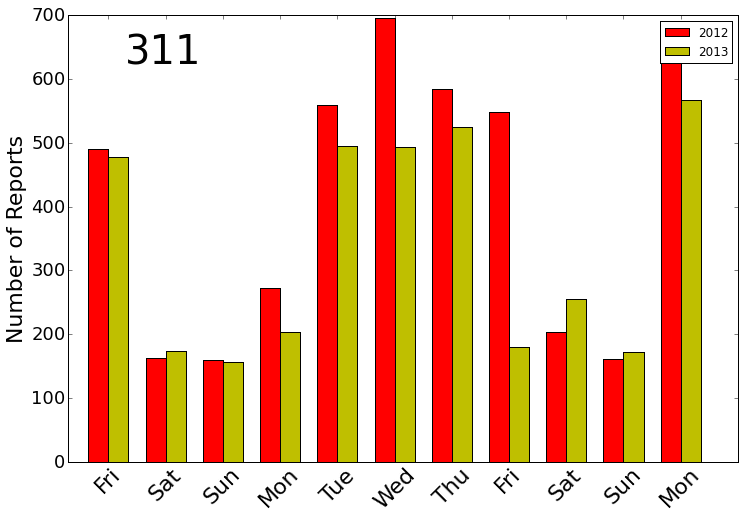

In [67]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#axTop = ax.twiny()

rects1 = ax.bar(ind, counts_2012, width, color='r')

rects2 = ax.bar(width+ind, counts_2013, width, color='y')

ax.set_xlim(-width, len(ind) + width)
#axTop.set_xlim(-width, len(ind) + width)
ax.set_ylim(0, maxCount)
ax.set_ylabel('Number of Reports', fontsize=22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
#axTop.set_xlabel('Dates in 2013')
#ax.set_xlabel('Days of the Week')
#ax.set_title('311 Call Volume, Ten Days in April')
ax.set_xticks(ind+width)
#axTop.set_xticks(ind+width)

tickNames = ax.set_xticklabels(tick_labels)
#topNames = axTop.set_xticklabels(top_labels)
plt.setp(tickNames, rotation=45, fontsize=22)
#plt.setp(topNames, rotation=45, fontsize=25)

ax.legend((rects1[0], rects2[0]), years)


ax.text(2*width, 625, prefix, fontsize=40)

def autolabel(rects):
# attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
            ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.savefig(outputfile, dpi=96)
#plt.show()

# for each in ('2012', '2013'):
#     boston = bm.BostonScatter(reports[each])
#     boston.plotMap(outname=prefix + '_scatter_311_' + each,
#                    title='Locations of 311 Reports in 10-day Period for ' + each)
#     boston = bm.BostonDensity(reports[each])
#     boston.plotMap(outname=prefix + '_density_311_' + each,
#                    title='Locations of 311 Reports in 10-day Period for ' + each)